In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (16, 6)})

**IMPORT DATA FROM CLEAN CSV**

In [2]:
pd.set_option('display.max_columns', None)
shark_attacks = pd.read_csv("../data/clean_attacks.csv", encoding="latin1")
shark_attacks = pd.DataFrame(shark_attacks)
shark_attacks.sample(3)

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,clean_time,clean_age,clean_year,clean_sex,clean_activity
6040,1847.09.10,10-Sep-1847,1847.0,Unprovoked,USA,Massachusetts,"Chelsea Beach, Suffolk County",Wading,Amos Thompson,M,NaN,Lacerations to arm,N,NaN,NaN,Louisville Daily Courier. 9/16/1847,Unknown,Unknown,1847,M,Unknown
794,2012.05.16,16-May-2012,2012.0,Unprovoked,FIJI,NaN,Matacucu Reef,Spearfishing,Tevita Naborisi,M,20,Lacerations to head,N,NaN,NaN,"Fiji Times, 5/17/2012",Unknown,20,2012,M,Fishing
4717,1942.01.18,18-Jan-1942,1942.0,Boat,AUSTRALIA,New South Wales,Fairy Bower,NaN,paddle of surf-ski,NaN,NaN,Paddle of surf ski bitten by shark,N,NaN,NaN,"G.P. Whitley (1951), p. 192",Unknown,Unknown,1942,Unknown,Unknown


**VISUALIZATION**

    Centuries of Shark Attacks: Tracing the Evolution

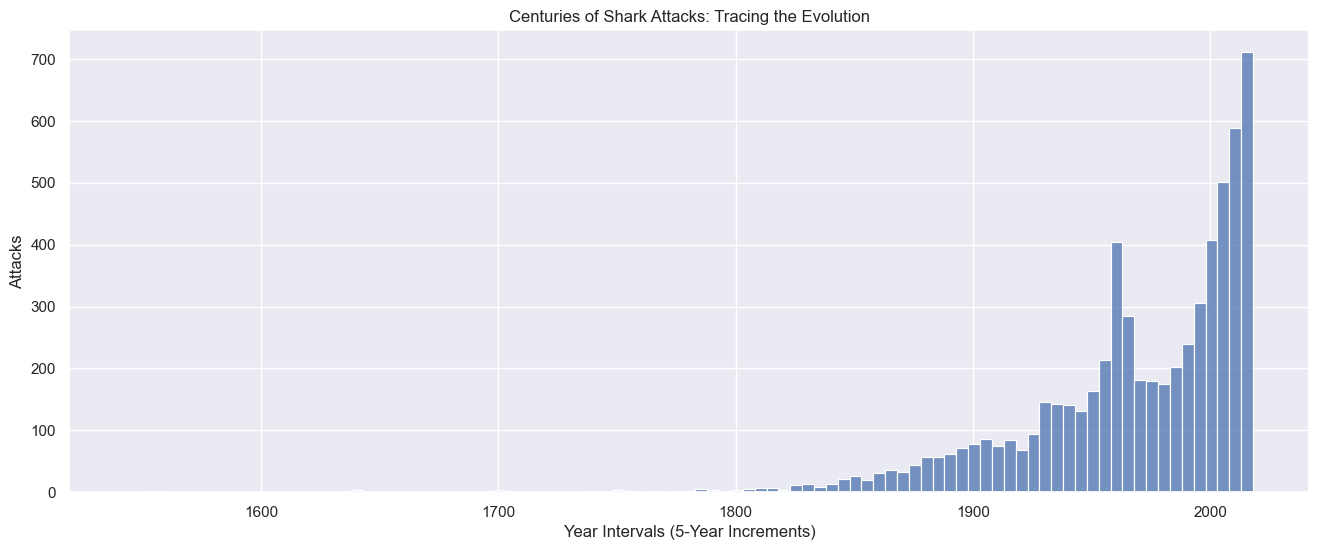

In [3]:
shark_attacks_1 = shark_attacks[shark_attacks['clean_year'] != 'Unknown']
shark_attacks_1.loc[:, 'clean_year'] = shark_attacks_1['clean_year'].astype(int)
bins = range(int(shark_attacks_1['clean_year'].min()), int(shark_attacks_1['clean_year'].max()) + 5, 5)

sns.histplot(data=shark_attacks_1, x='clean_year', bins=bins)
plt.title('Centuries of Shark Attacks: Tracing the Evolution')
plt.xlabel('Year Intervals (5-Year Increments)')
plt.ylabel('Attacks')
plt.show()

In [4]:
print("Max is: ", max(shark_attacks_1['clean_year']))
print("Min is: ", min(shark_attacks_1['clean_year']))

Max is:  2018
Min is:  1543


What I wanted to see in the graph above is the evolution of shark attacks over the years, if they were more active in the last centuries or if their activity has increased in the last 20 years. As there were almost no attacks between 1543 and 1800, I have made another graph of the evolution since they started to be visible in the graph above, which is around 1800 so that we see the evolution more distributed on the x-axis.

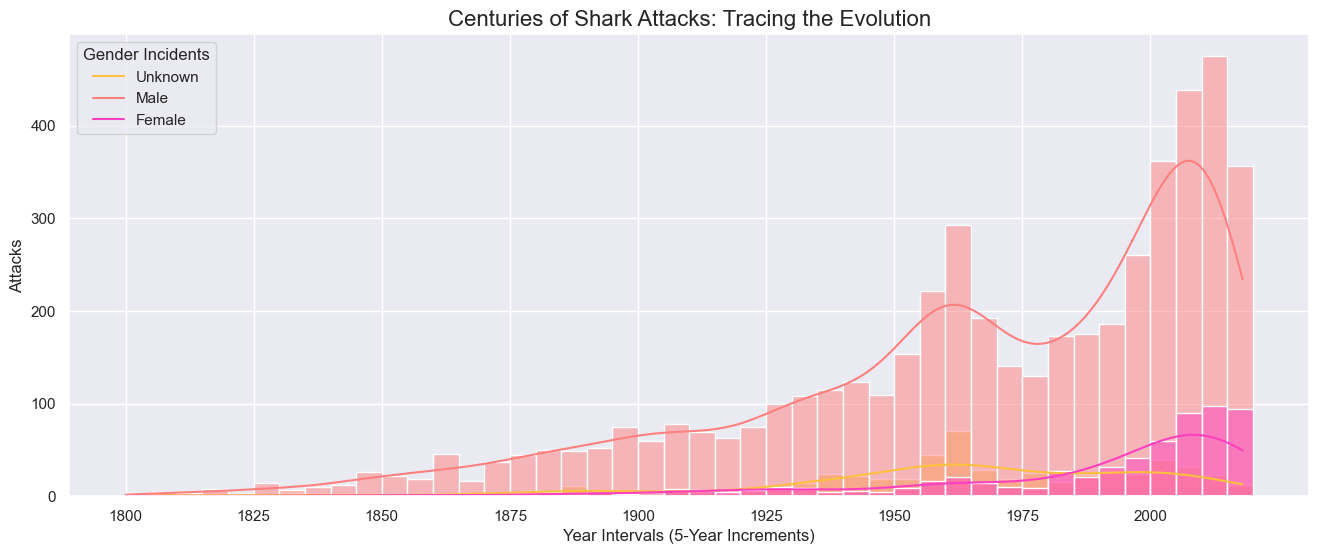

In [5]:
shark_attacks_1 = shark_attacks_1[shark_attacks_1['clean_year'] >= 1800]
bins = range(int(shark_attacks_1['clean_year'].min()), int(shark_attacks_1['clean_year'].max()) + 5, 5)
plot_1 = sns.histplot(data=shark_attacks_1, x='clean_year', bins=bins, kde=True, palette="spring", hue='clean_sex')

plt.title('Centuries of Shark Attacks: Tracing the Evolution', fontsize=16)
plt.xlabel('Year Intervals (5-Year Increments)')
plt.ylabel('Attacks')
plt.legend(labels=["Unknown", "Male", "Female"], title="Gender Incidents")
plt.xticks(range(shark_attacks_1['clean_year'].min(), shark_attacks_1['clean_year'].max() + 1, 25))
plot_1.figure.savefig(f'../images/trace_evolution.png', bbox_inches='tight')
plt.show()

The kde=True compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.

    Shark Attack Activities: What Stands Out as the Most Common?, Which Gender Dominates the Scene?

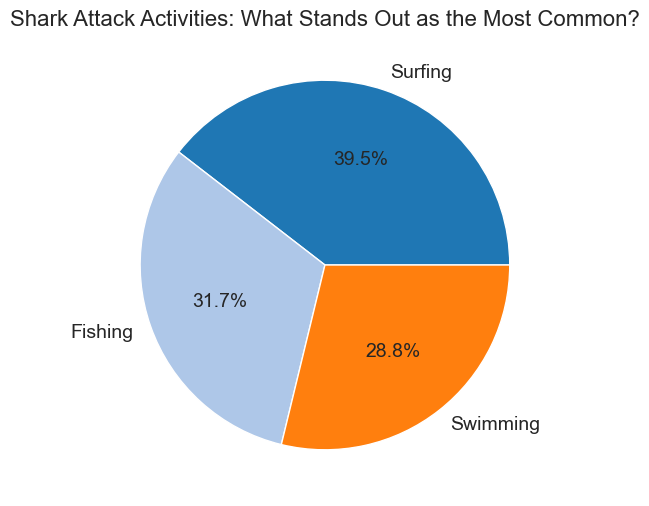

In [6]:
shark_attacks_2 = shark_attacks[shark_attacks['clean_activity'] != 'Unknown']
activities = set(shark_attacks_2['clean_activity'])
mean = len(shark_attacks_2) / len(activities)
activities_ = shark_attacks_2['clean_activity'].value_counts()
activities_to_keep = activities_[activities_ >= mean].index

shark_attacks_filtered = shark_attacks_2[shark_attacks_2['clean_activity'].isin(activities_to_keep)]
shark_attacks_filtered_count = shark_attacks_filtered['clean_activity'].value_counts()
shark_attacks_filtered_count.plot.pie(autopct="%.1f%%", colors=sns.color_palette('tab20'), textprops={'fontsize':14})

plt.title('Shark Attack Activities: What Stands Out as the Most Common?', fontsize=16)
plt.ylabel('')
plt.savefig(f'../images/most_common_activity.png', bbox_inches='tight')
plt.show()

For the graph above I've avoided the categorized activities with 'Unknown' and then I've computed the mean of attacks for the rest of the activities in order to classify those that are above the mean to compare them. After checking those that are above the mean, the most common activities are the seen above. I've also wanted to see the classification of shark attacks for those common activities as it can be seen in the graph below.

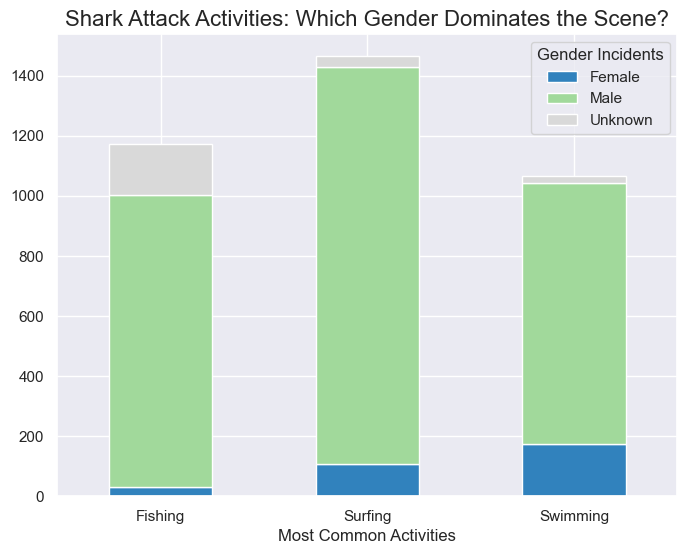

In [7]:
sns.set(rc={"figure.figsize": (8, 6)})
grouped = shark_attacks_filtered.groupby(['clean_activity', 'clean_sex']).size().unstack()
grouped.plot(kind='bar', stacked=True, colormap='tab20c')

plt.title('Shark Attack Activities: Which Gender Dominates the Scene?', fontsize=16)
plt.xlabel('Most Common Activities')
plt.ylabel('')
plt.xticks(rotation=0)
plt.legend(labels=["Female", "Male", "Unknown"], title="Gender Incidents")
plt.savefig(f'../images/most_common_activity_sex.png', bbox_inches='tight')
plt.show()

    Shark Attack Patterns: The Age Connection (Young Minds at Play)

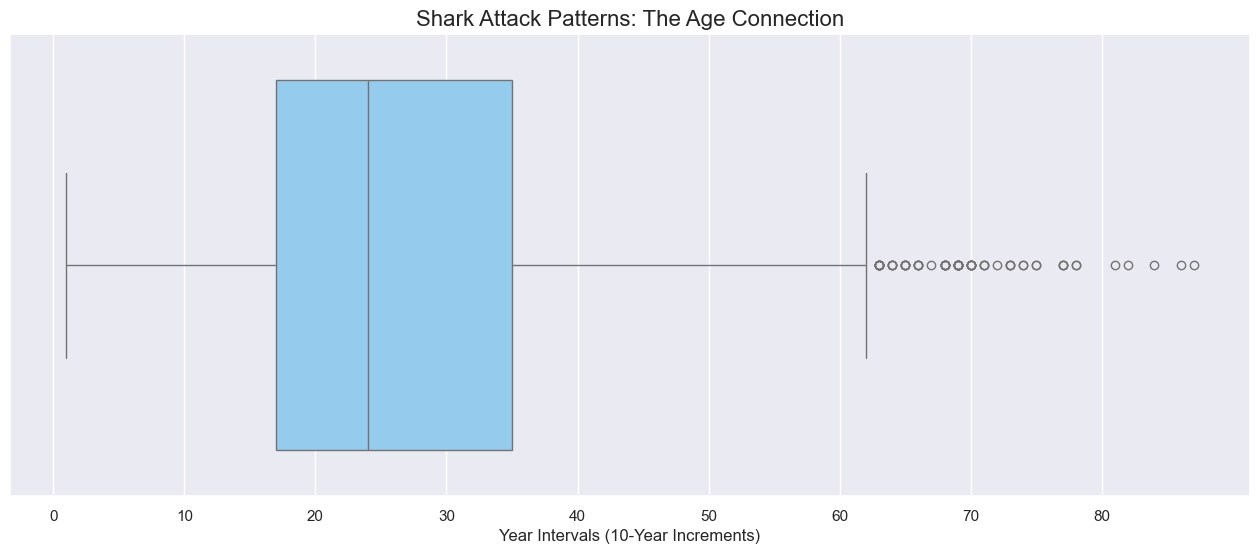

In [8]:
sns.set(rc={"figure.figsize": (16, 6)})
shark_attacks_3 = shark_attacks[(shark_attacks['clean_age'] != '< 1') & (shark_attacks['clean_age'] != 'Unknown')]
shark_attacks_3.loc[:, 'clean_age'] = shark_attacks_3['clean_age'].astype(int)
shark_attacks_3 = shark_attacks_3.sort_values(by='clean_age')
plot_3 = sns.boxplot(data=shark_attacks_3, x='clean_age', color="lightskyblue")

plt.title('Shark Attack Patterns: The Age Connection', fontsize=16)
plt.xlabel('Year Intervals (10-Year Increments)')
plt.xticks(range(0, shark_attacks_3['clean_age'].max() + 1, 10))
plot_3.figure.savefig(f'../images/age_attack_patterns.png', bbox_inches='tight')
plt.show()


The boxplot above shows the dispersion of shark attacks by age. The 50% of the data is between 17 and 35 years old an the mean of age people attacked is in 24 years, that means that the 25% of the people attacked by sharks are between 17 and 24 years old.

    Exploring Shark Activity: A 24-Hour Perspective

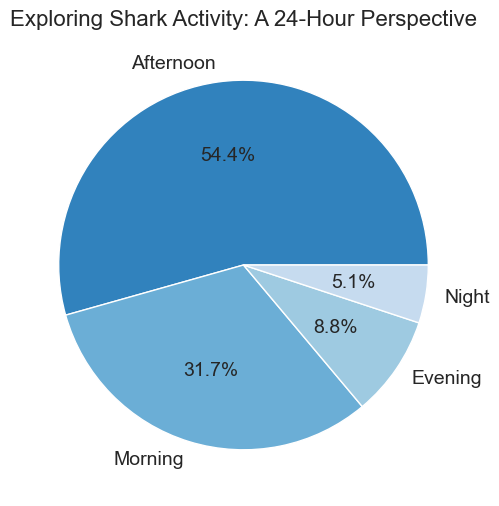

In [9]:
shark_attacks_4 = shark_attacks[shark_attacks['clean_time'] != 'Unknown']
shark_activity = shark_attacks_4['clean_time'].value_counts()
shark_activity.plot.pie(autopct="%.1f%%", colors=sns.color_palette('tab20c'), textprops={'fontsize':14})

plt.title('Exploring Shark Activity: A 24-Hour Perspective', fontsize=16)
plt.ylabel('')
plt.savefig(f'../images/shark_activity.png', bbox_inches='tight')
plt.show()

    Diving into Data: Men's Role in Shark Attacks

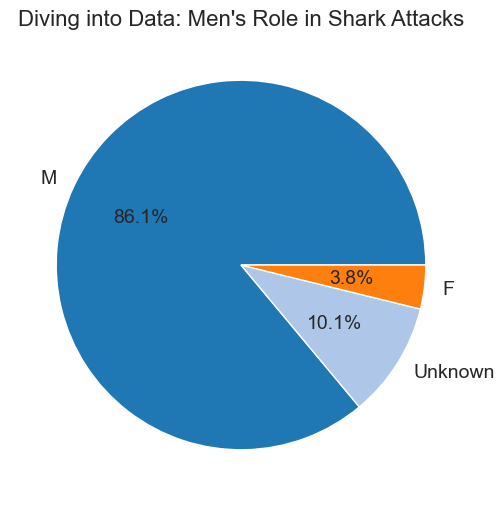

In [10]:
shark_attacks_5 = shark_attacks[shark_attacks['type'] == 'Provoked']
men_behavior = shark_attacks_5['clean_sex'].value_counts()
men_behavior.plot.pie(autopct="%.1f%%", colors=sns.color_palette('tab20'), textprops={'fontsize':14})

plt.title("Diving into Data: Men's Role in Shark Attacks", fontsize=16)
plt.ylabel('')
plt.savefig(f'../images/men_behavior.png', bbox_inches='tight')
plt.show()
